# Price and Channel Customer Predictor

## Problem Statement
An online clothing store has an app or a website where customers can purchase clothes online. Customers can check for the clothes they want via the app or the website. The company offers the customers a free live session where, which entails them coming over to the the store to try the outfit they are interested in. Customers can they go back home and order what they are interested, either through the website or mobile app. 

## Goal
we want to predict how much a person/customer is likely to spend in a year.
we also want to see what feature has a significant influence on how much a customer spends

### Importing the libraries:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
RANDOM_STATE = 42

### Reading the dataset:

In [4]:
df = pd.read_csv("Ecommerce Customers.csv")

In [5]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

Note: Average Session time, Time on App, and Time on website are in minutes; Length of Membership is in months; yearly amount spent, is in dollar, that is the label (y)

We need just the numerical variables since, we are interested in predicting the amount a user will spend yearly. Hence, email, Address, and Avatar, are not so relevant

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


To understand the dataset a bit better, we can use the describe function, which basically gives the statistical information

In [7]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

verifying for inf values from our dataset with numeric data types

In [16]:
numeric_df = df.select_dtypes(include=[np.number])

has_inf = np.isinf(numeric_df.to_numpy()).any()
print("Has infinity values? ", has_inf)

Has infinity values?  False


Since, it has no infinity values, we can go on to see if there's a correlation between time on website and yearly amount spent. Now, performing Exploratory data analysis:

D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


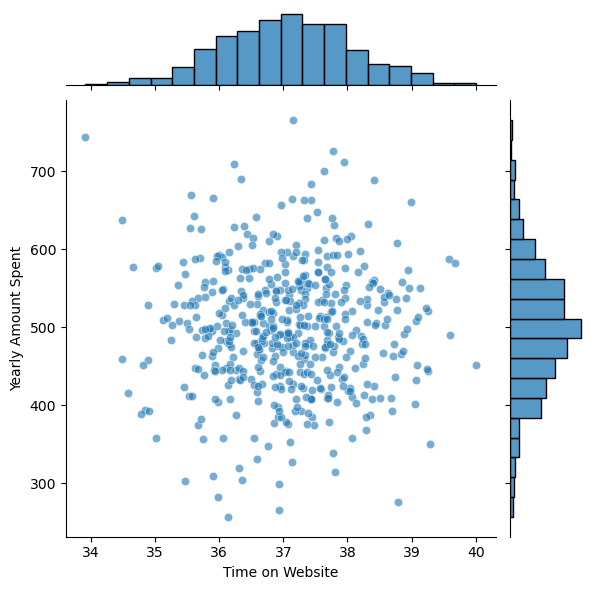

In [17]:
#EDA

sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = df, alpha = 0.6)

let's ignore the inf warning

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

The joint plot does not reveal any significant correlation between Yearly amount and the time spent on the website

Checking the yearly amount with mobiel app to see if there's a correlation:

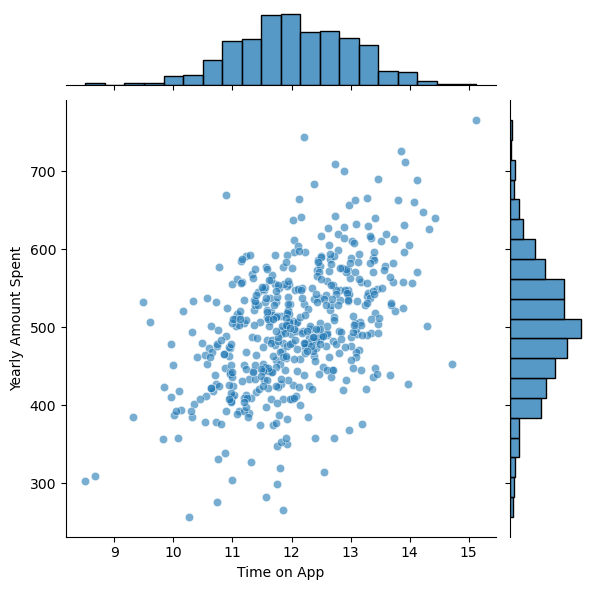

In [23]:
sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = df, alpha=0.6)

This plot reveals that there's a better correlation than the Time on website

utilizing pairplot to understand our data more:

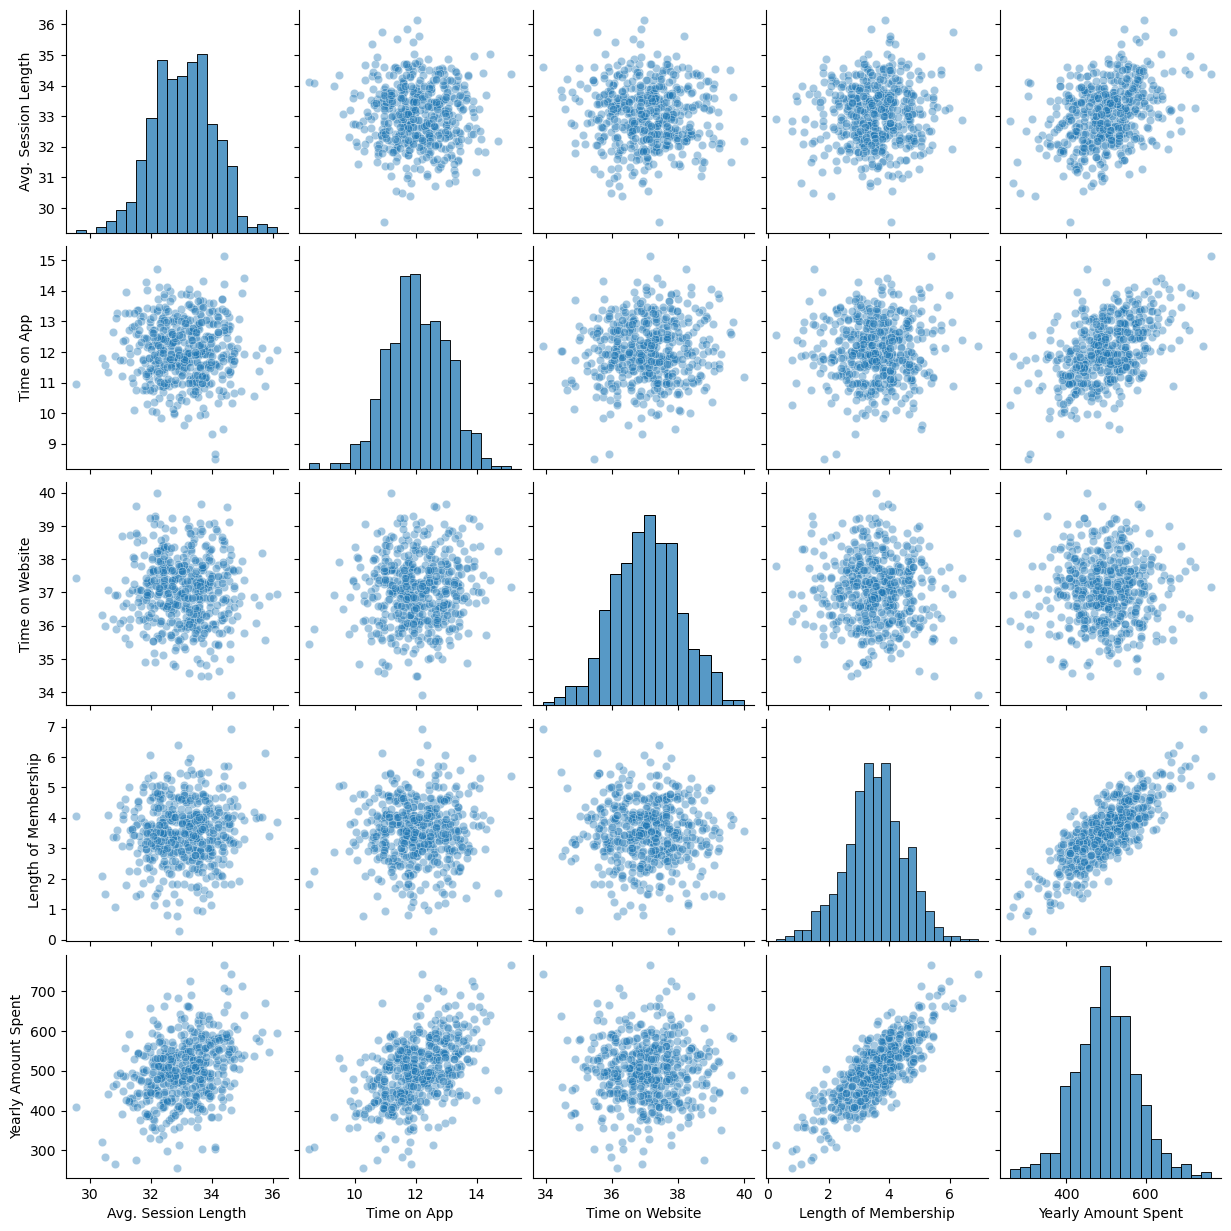

In [24]:
sns.pairplot(df, kind ='scatter', plot_kws={'alpha': 0.4})

And... There's a strong correlation between the length of membership and yearly amount

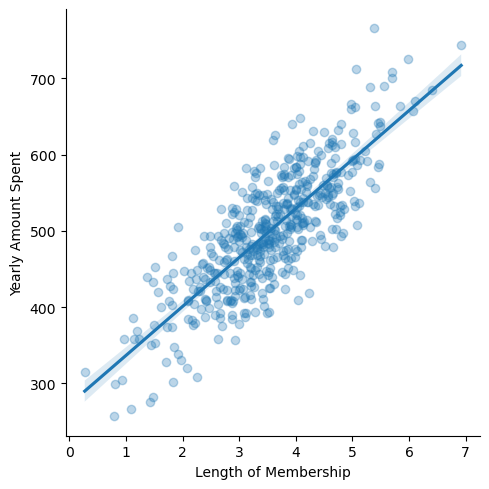

In [25]:
sns.lmplot(x = "Length of Membership", y = "Yearly Amount Spent", data = df, scatter_kws={'alpha':0.3})

Now, that the data has been understood, it's time to work with our model

In [26]:
from sklearn.model_selection import train_test_split

### splitting the train and test set

In [32]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_STATE)

## Training the model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression()

In [41]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

these coefficient are just simply the weight for every features

In [43]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


basically it just shows how much each of the variable is important to the model. So we can see the longer a user has been a customer with the store, spends in a session, and spend on the app, the more likey they are to spend money.

## Predictions

In [45]:
predictions = lm.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

## Evaluation

Now, to evaluate how well our model performed, we look at the correlation between our predicted values and the ylabel

Text(0.5, 1.0, 'Evaluation of our linear Model')

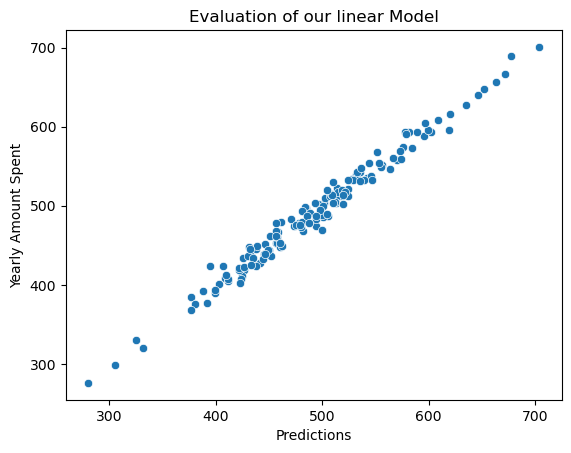

In [49]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our linear Model")

From the plot, it strongly correlates

### Evaluating using mean squared error, mean absolute error, and root mean squared error

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [53]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE): ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  8.42609164143213
Mean Squared Error:  103.91554136503366
Root Mean Squared Error (RMSE):  10.19389726086317


Our model performs fair. With an error of 8 units that revolves around the mean of our y_label. we used the Mean Squared Error to guage for outliers, incase of any. Since the RMSE is so not higher than MAE suggest that the model is not making a huge outlier mistake. error percentage is appproximately 1 to 2%

### Residuals

residual is the difference between the actual value and the predicted value for each data point. They show how far off the model was for each point. They also help to reveal the model if it is biased or missing patterns in data.

In [55]:
residuals = y_test - predictions

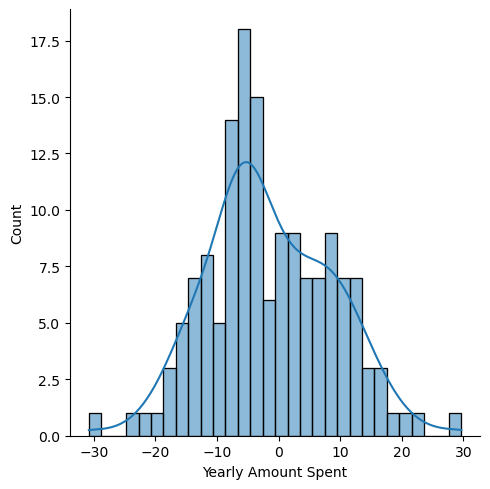

In [57]:
sns.displot(residuals, bins=30, kde=True)

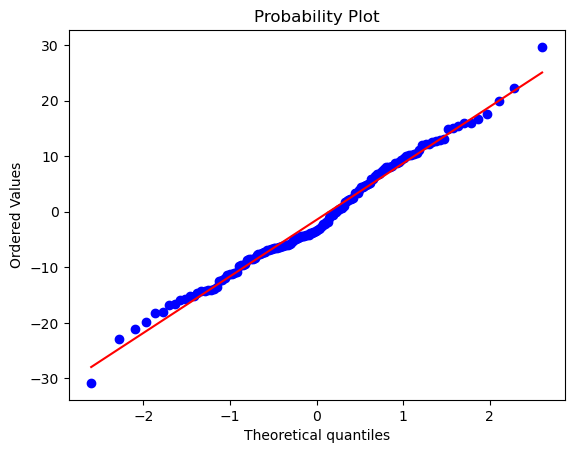

In [59]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

since the points are on a straight line, it means the residuals are roughly normal, which is good. And that the residuals are normally distributed.